$$
Ax = b \Rightarrow \tilde{x} = (AA^T)^{-1}A^Tb
$$

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

In [27]:
size = 10000
training_data_percentage = 0.7
rng = default_rng()

$x_{1}$ is a vector of 10000 random numbers from a normal distribution with mean 0 and standard deviation 1.

In [28]:
x1 = rng.normal(0, 1, size=size)

$x_{2}$ is another vector with same properties as $x_{1}$.

In [29]:
x2 = rng.normal(0, 1, size=size)

$x_{3}$ vector is constructed by the following formula:
$$ x_{3} = x_{1} + x_{2} + \epsilon $$

where $\epsilon$ is a vector of 10000 random numbers from a normal distribution with mean 0 and standard deviation $10^{-10}$. 

In [30]:
x3 = x1 - x2 + rng.normal(0, 10e-10, size=size)

x is a matrix with 3 columns, where each column is constructed by the corresponding $x_{1}, x_{2}, x_{3}$.

In [31]:
x = np.column_stack([x1, x2, x3])
x

array([[ 2.02907450e-01,  2.41250304e-01, -3.83428528e-02],
       [-3.54961855e-01, -1.27335077e+00,  9.18388912e-01],
       [ 8.29894057e-01, -6.53308073e-02,  8.95224865e-01],
       ...,
       [-1.61050287e-03,  1.75431512e+00, -1.75592563e+00],
       [ 1.52456106e+00,  2.64824595e-01,  1.25973646e+00],
       [ 3.82676100e-01,  4.08742083e-01, -2.60659821e-02]])

y is our target vector, which is constructed by the following formula:
$$ y = 2x_{1} + 3x_{2} + 4x_{3} $$

In [32]:
y = 2*x1 + 3*x2 - 4*x3 

Now we split our data into train and test sets. We use 70% of the data for training and 30% for testing.

In [33]:
train_x = x[:int(size*training_data_percentage)]
train_y = y[:int(size*training_data_percentage)]

In [34]:
test_x = x[int(size*training_data_percentage):]
test_y = y[int(size*training_data_percentage):]

as of least squares estimation, we need to estimate the coefficients of our model. this can be done by the following formula:
$$ \hat{\theta} = (X^TX)^{-1}X^Ty $$

In [35]:
xT = np.transpose(train_x)
xTx = np.matmul(xT, train_x)
xTx_inv = np.linalg.inv(xTx)
xTx_inv_xT = np.matmul(xTx_inv, xT)

In [36]:
estimator = np.matmul(xTx_inv_xT, train_y)

In [37]:
print("Estimator:")
print("theta1:", estimator[0])
print("theta2:", estimator[1])
print("theta3:", estimator[2])

Estimator:
theta1: -5.443491460107907
theta2: 6.202050028958183
theta3: 0.36203963649313664


Now we can use our model to predict the values of y for the test set.

In [38]:
y_est = np.matmul(test_x, estimator)

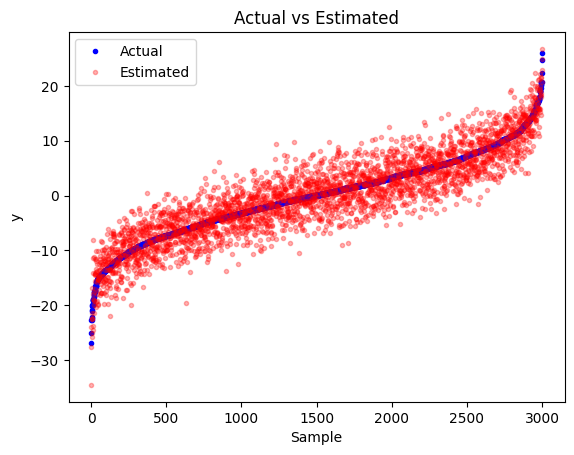

In [39]:
plot1 = plt.figure(1)
x_axis = [i for i in range(int(size*(1-training_data_percentage)))]
holder = test_y.argsort()
plt.plot(x_axis, test_y[holder], 'b.', label='Actual')
plt.plot(x_axis, y_est[holder], 'r.', alpha=0.3, label='Estimated')
plt.xlabel('Sample')
plt.ylabel('y')
plt.title('Actual vs Estimated')
plt.legend()

We can see that the predicted values are kind of close to the actual values. But this is not a good estimation and our estimator values are not even close to the actual values. <br />
This is because the $x_{3}$ vector is almost linearly dependent on the other two vectors because of the small value of $\epsilon$ vector. <br />
This is why we need to use orthogonalization.

We can use the Gram-Schmidt process to orthogonalize our vectors. <br />
In this process, we start with the first vector and then we subtract the projection of the second vector on the first vector from the second vector. <br />
Then we subtract the projection of the third vector on the first vector and the projection of the third vector on the second vector from the third vector. <br />
We repeat this process for all the vectors. <br /> <br />
The projection operator is defined as:
$$ P_{u}(v) = \frac{\langle u, v \rangle}{\langle u, u \rangle}u $$

where $u$ is the vector on which we project and $v$ is the vector which we project on $u$. <br />
This process will give us a set of orthogonal vectors.

In [40]:
def gram_schmidt(x):

    n = len(x)
    x_orth = [x[0]]

    for i in range(1, n):
        x_orth_i = x[i]

        for j in range(i):
            term = np.matmul(np.transpose(x_orth[j]), x[i])
            term = term / np.matmul(np.transpose(x_orth[j]), x_orth[j])
            term = term * x_orth[j]
            x_orth_i = x_orth_i - term

        x_orth.append(x_orth_i)

    return x_orth

Now we can use the same process as before to estimate the coefficients of our model using the orthogonalized vectors. <br />

In [41]:
x_orth_T = gram_schmidt(np.transpose(train_x))
x_orth = np.transpose(x_orth_T)

x_orth_T_x_orth = np.matmul(x_orth_T, x_orth)
x_orth_T_x_orth_inv = np.linalg.inv(x_orth_T_x_orth)
x_orth_T_x_orth_inv_x_orth_T = np.matmul(x_orth_T_x_orth_inv, x_orth_T)

In [42]:
train_y_orth = 2*x_orth[:, 0] + 3*x_orth[: ,1] - 4*x_orth[: ,2]

In [43]:
orth_estimator = np.matmul(x_orth_T_x_orth_inv_x_orth_T, train_y_orth)

In [44]:
print("Orthogonal Estimator:")
print("theta1:", orth_estimator[0])
print("theta2:", orth_estimator[1])
print("theta3:", orth_estimator[2])

Orthogonal Estimator:
theta1: 2.000000000000001
theta2: 2.999999999999999
theta3: -4.000000011175871


As we can see, the estimated values are much closer to the actual values. <br />

In [45]:
y_est_orth = np.matmul(test_x, orth_estimator)

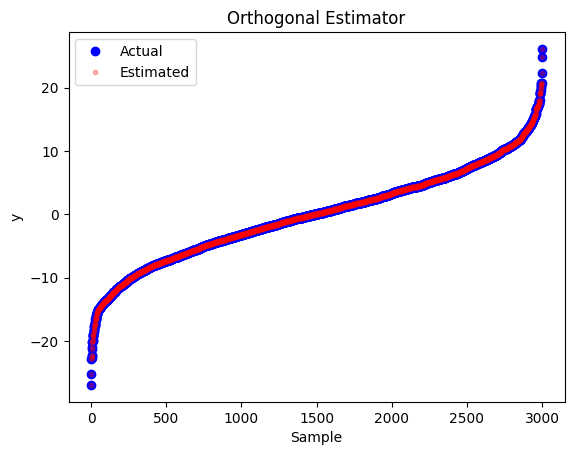

In [46]:
plot2 = plt.figure(2)
plt.plot(x_axis, test_y[holder], 'bo', label='Actual')
plt.plot(x_axis, y_est_orth[holder], 'r.', alpha=0.3, label='Estimated')
plt.xlabel('Sample')
plt.ylabel('y')
plt.title('Orthogonal Estimator')
plt.legend()

The estimated values with the orthogonalized vectors are much closer to the actual values. <br />

Text(0.5, 1.0, 'Error of Least Squares Estimator Without Orthogonalization')

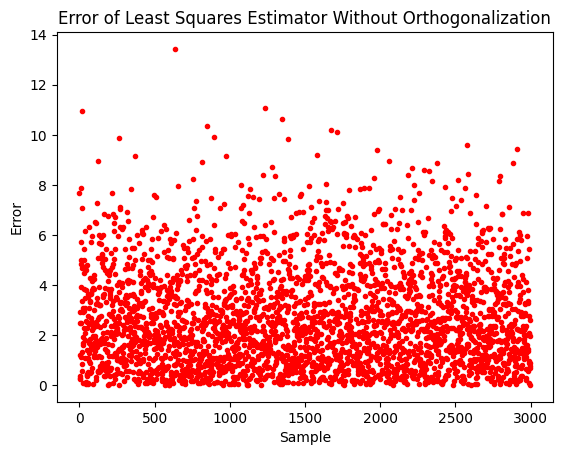

In [47]:
error1 = abs((test_y - y_est))
plot3 = plt.figure(3)
plt.plot(x_axis, error1[holder], 'r.')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.title('Error of Least Squares Estimator Without Orthogonalization')

Text(0.5, 1.0, 'Error of Least Squares Estimator With Orthogonalization')

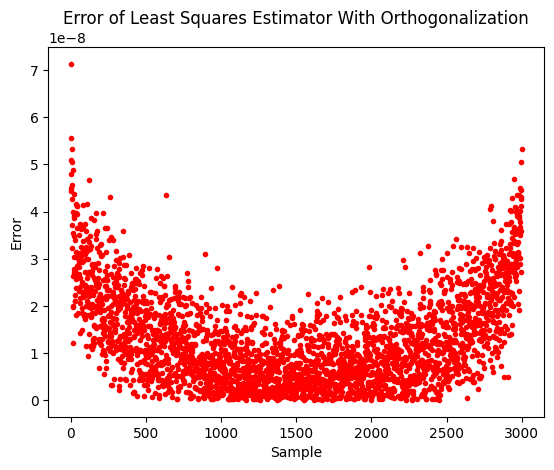

In [48]:
error2 = abs((test_y - y_est_orth))
plot4 = plt.figure(4)
plt.plot(x_axis, error2[holder], 'r.')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.title('Error of Least Squares Estimator With Orthogonalization')

The above plots clearly show that our results after orthogonalization are much better and closer to the actual values. <br />